In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv
import os
import pickle as pk
import glob 

%matplotlib inline

path = "/media/luffy/New Volume/Programming/python-p/Udacity_SDND/Term 1/Computer_Vision/CarND-Advanced-Lane-Lines/"

# Advance_lane_detection Algorithm #
    1. Start with camera calibration
    2. Read all the chessboard images and generate the obj points and img points
    3. Draw the lines of the corner points found by the function (Till here it has to be done only once)
    4. Take in the image or camera stream 
    5. Undistort the image or the video frame 
    6. Apply the sobel x filter and HLS filter to find out the edges
    7. Combine both the filters output 
    8. Apply homography transform for bird's eye view
    9. Compute the histogram of the bottom half of the image and acquire the points where there are maximum points on the y axis
    10. Use those points for sliding window base for the left and right lane of the road
    11. After finding the points fit a polynomial through it on both the sides 
    12. Use the previously found polynomial to find the points which are in the margin
    13. Find the polynomial again and mark the area 
    14. 

False
0
True


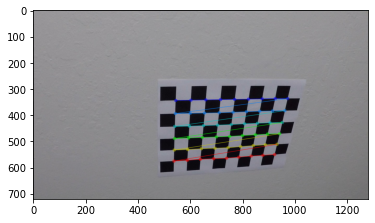

1
True


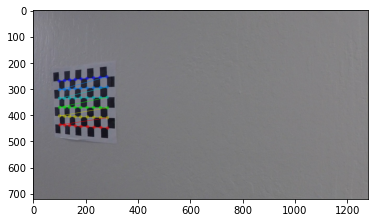

2
True


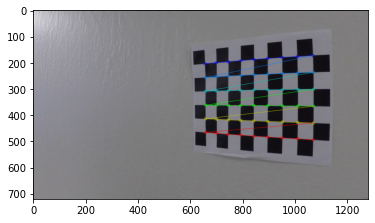

3
True


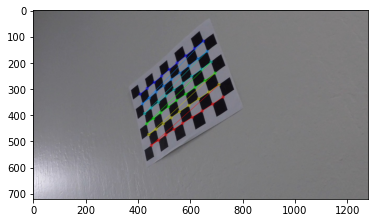

4
True


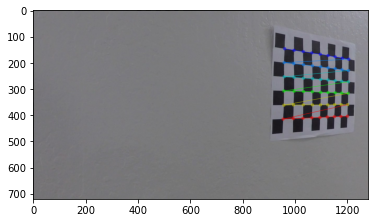

5
True


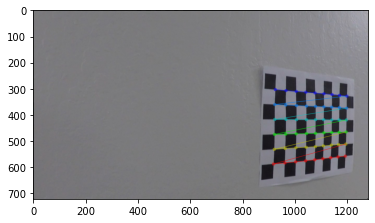

6
True


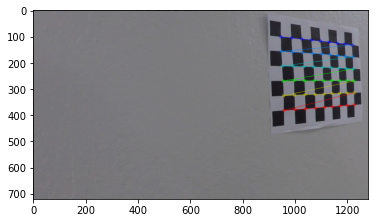

7
True


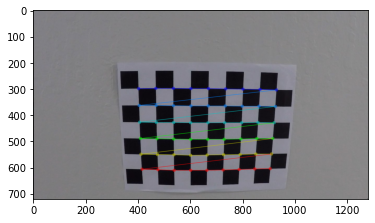

8
True


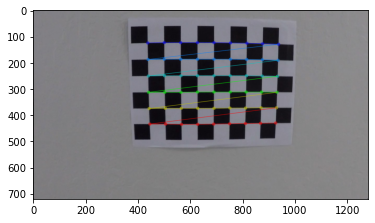

9
True


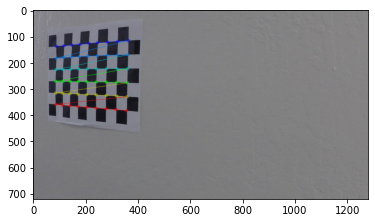

10
True


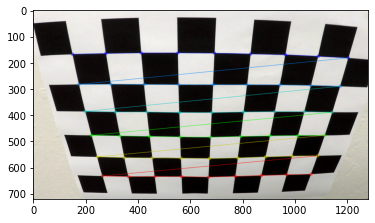

11
True


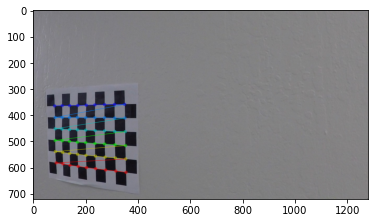

12
True


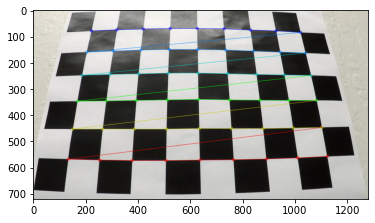

13
False
13
False
13
True


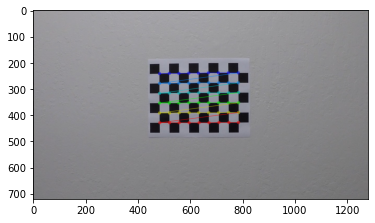

14
True


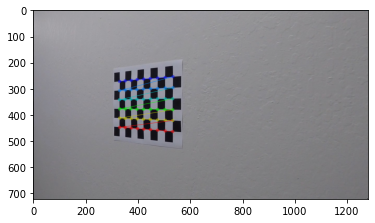

15
True


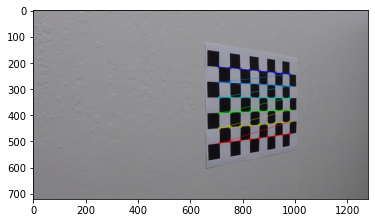

16
True


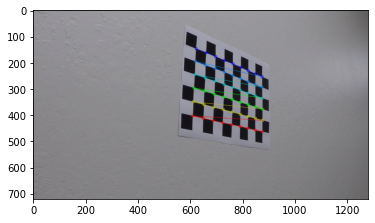

17


In [33]:
fname = glob.glob(path+"/camera_cal/*.jpg")

counter = 0

#Preparing the array for ObjectPoints and the corresponding pixel location (ImagePoints) array
ObjPoints = np.zeros((9*6,3), np.float32)
ObjPoints[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

#Empty array of the ImgPoints and ObjPoints
ObjP = []
ImgP = []

# Setting the termination criteria for the cornerSubPix method
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Accessing all the images using glob module
for image in fname:
    input_image = mpimg.imread(image)

    gray_image = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray_image, (9,6), None)
    print(ret)
    if(ret == True):
        counter = counter + 1
        ObjP.append(ObjPoints)
        corners_accurate = cv.cornerSubPix(gray_image, corners, (11,11), (-1,-1), criteria)

        # Appending the image points to the ImgP
        ImgP.append(corners_accurate)

        #Drawing the corners and Displaying them
        cv.drawChessboardCorners(input_image, (9,6), corners_accurate, ret)
        plt.imshow(input_image)
        plt.show()
print(counter)